In [1]:
import gdown

In [2]:
url = "https://drive.google.com/file/d/1E6K8FKGg8ZFQJ9sIXCry80tPDlk491px/view?usp=drive_link"

gdown.download(url, "sign_data.zip", fuzzy=True)

Downloading...
From (original): https://drive.google.com/uc?id=1E6K8FKGg8ZFQJ9sIXCry80tPDlk491px
From (redirected): https://drive.google.com/uc?id=1E6K8FKGg8ZFQJ9sIXCry80tPDlk491px&confirm=t&uuid=38784943-7c9d-42ba-b981-e4af5052a5a2
To: /content/sign_data.zip
100%|██████████| 281M/281M [00:06<00:00, 46.7MB/s]


'sign_data.zip'

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [4]:
!unzip sign_data.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/V/819.jpg          
  inflating: data/V/82.jpg           
  inflating: data/V/820.jpg          
  inflating: data/V/821.jpg          
  inflating: data/V/822.jpg          
  inflating: data/V/823.jpg          
  inflating: data/V/824.jpg          
  inflating: data/V/825.jpg          
  inflating: data/V/826.jpg          
  inflating: data/V/827.jpg          
  inflating: data/V/828.jpg          
  inflating: data/V/829.jpg          
  inflating: data/V/83.jpg           
  inflating: data/V/830.jpg          
  inflating: data/V/831.jpg          
  inflating: data/V/832.jpg          
  inflating: data/V/833.jpg          
  inflating: data/V/834.jpg          
  inflating: data/V/835.jpg          
  inflating: data/V/836.jpg          
  inflating: data/V/837.jpg          
  inflating: data/V/838.jpg          
  inflating: data/V/839.jpg          
  inflating: data/V/84.jpg           
  inflating: data/V/840.jpg          

In [5]:
# Define dataset path
DATA_PATH = "/content/data"

In [6]:
# Get the list of directories
categories = sorted(os.listdir(DATA_PATH))
print(f"Categories: {categories}")

Categories: ['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [7]:
# Function to load images and labels using OpenCV
def load_images_and_labels(data_path, categories, img_size=(64, 64)):
    images = []
    labels = []
    for category in categories:
        category_path = os.path.join(data_path, category)
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, img_size)
            img_array = img_to_array(img)
            images.append(img_array)
            labels.append(category)
    return np.array(images), np.array(labels)

# Load images and labels
images, labels = load_images_and_labels(DATA_PATH, categories)

In [8]:
# Plot distribution of images per class
label_counts = pd.Series(labels).value_counts().sort_index()
fig = px.bar(label_counts, title="Distribution of Images per Class")
fig.show()

In [9]:
# Encode labels
label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)

In [10]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

In [11]:
# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
# Data augmentation using ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)
datagen.fit(X_train)

In [13]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [14]:
# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), validation_data=(X_test, y_test), epochs=20)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 54s 45ms/step - accuracy: 0.5528 - loss: 1.5070 - val_accuracy: 0.9951 - val_loss: 0.0138
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 42ms/step - accuracy: 0.9666 - loss: 0.1025 - val_accuracy: 1.0000 - val_loss: 3.3214e-04
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 43ms/step - accuracy: 0.9841 - loss: 0.0522 - val_accuracy: 1.0000 - val_loss: 4.5818e-06
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 43ms/step - accuracy: 0.9854 - loss: 0.0482 - val_accuracy: 1.0000 - val_loss: 2.4865e-05
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 42ms/step - accuracy: 0.9893 - loss: 0.0325 - val_accuracy: 1.0000 - val_loss: 6.7685e-04
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 43ms/step - accuracy: 0.9902 - loss: 0.0315 - val_accuracy: 1.0000 - val_loss: 3.7511e-06
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 42ms/step - accuracy: 0.9947 - loss: 0.0176 - val_accuracy: 1.0000 - val_loss: 3.1225e-05
Epoch 8/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 84s 44ms/s

In [15]:
# Evaluate the model
y_pred = model.predict(X_test)
y_test_labels = label_binarizer.inverse_transform(y_test)
y_pred_labels = label_binarizer.inverse_transform(y_pred)

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [16]:
# Confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=categories)

# Plot confusion matrix with annotations
fig_cm = px.imshow(cm, x=categories, y=categories, title='Confusion Matrix', color_continuous_scale='Blues', text_auto=True)
fig_cm.update_layout(xaxis_title='Predicted Label', yaxis_title='True Label')
fig_cm.show()

In [17]:
# Plot loss and accuracy curves
epochs = list(range(1, len(history.history['loss']) + 1))

fig_loss = px.line(x=epochs, y=history.history['loss'], labels={'x': 'Epoch', 'y': 'Loss'}, title='Training Loss')
fig_loss.add_scatter(x=epochs, y=history.history['val_loss'], mode='lines', name='Validation Loss')
fig_loss.show()

fig_acc = px.line(x=epochs, y=history.history['accuracy'], labels={'x': 'Epoch', 'y': 'Accuracy'}, title='Training Accuracy')
fig_acc.add_scatter(x=epochs, y=history.history['val_accuracy'], mode='lines', name='Validation Accuracy')
fig_acc.show()

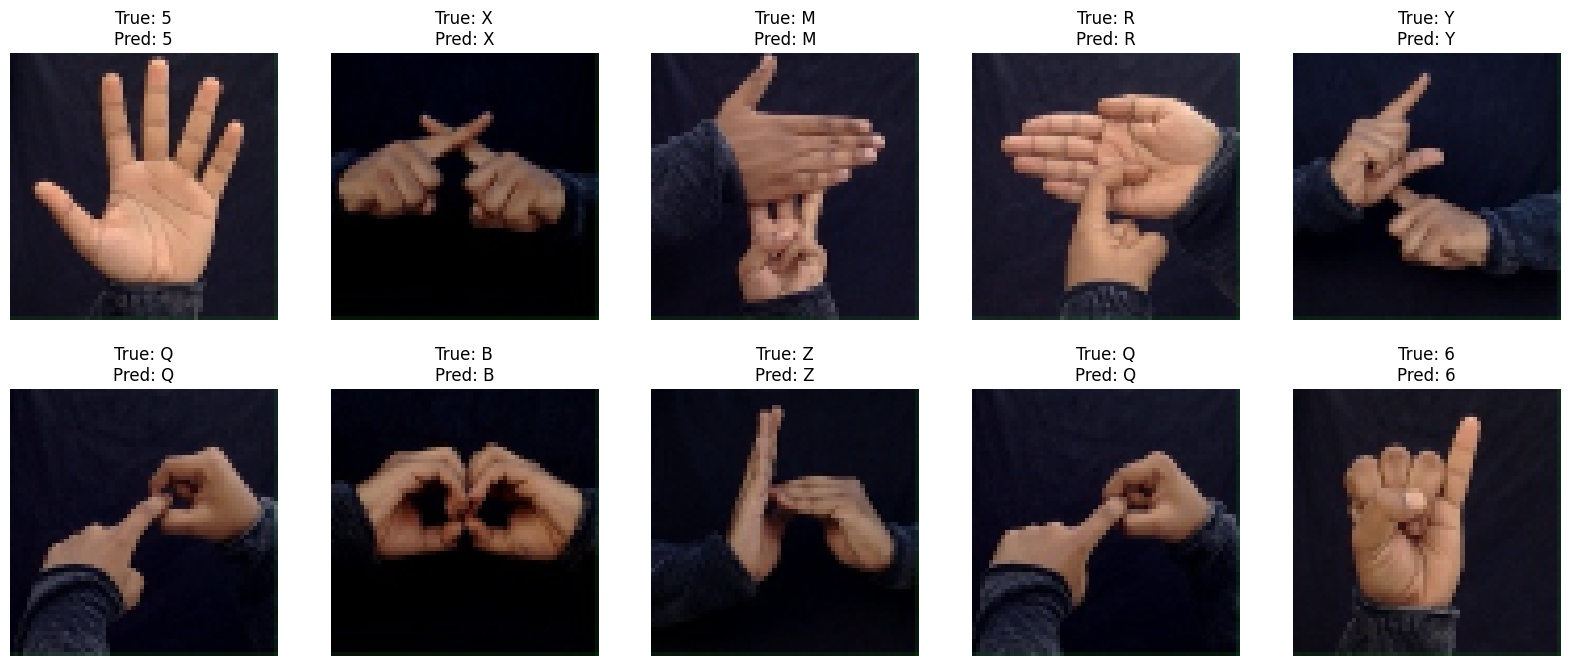

In [18]:
# Display 10 sample predictions
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i])
    true_label = label_binarizer.inverse_transform(np.array([y_test[i]]))[0]
    pred_label = y_pred_labels[i]
    ax.set_title(f"True: {true_label}\nPred: {pred_label}")
    ax.axis('off')
plt.show()

In [20]:
model.save('/content/model.h5')

In [21]:
# Check for overfitting by comparing training and validation loss/accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

if val_loss[-1] > train_loss[-1] and val_acc[-1] < train_acc[-1]:
    print("The model might be overfitting. Consider using regularization techniques or early stopping.")
else:
    print("The model does not seem to be overfitting.")

The model does not seem to be overfitting.
